In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cv = croos validation
clf classifier 
df = data frame

In [2]:
df = pd.read_csv("Movie_classification.csv")

In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [4]:
df.shape

(506, 19)

# Missing Value Imputation

In [5]:
df["Time_taken"].fillna(value=df['Time_taken'].mean(),inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

# Dummy Variable Imputation 

In [7]:
df = pd.get_dummies(df, columns = ['Genre','3D_available'],drop_first=True)

In [8]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,0,0,1,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,1,0,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,1,0,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,0,1,0,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,1,0,0


# X-y Split 

In [9]:
X = df.loc[:,df.columns!="Start_Tech_Oscar"]
type(X)

pandas.core.frame.DataFrame

In [10]:
y = df["Start_Tech_Oscar"]
type(y)

pandas.core.series.Series

In [11]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,0,0,1,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,1,0,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,1,0,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,0,1,0,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,1,0,0


In [12]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

# Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train = train_test_split(X,y,train_size=0.2,random_state=0)

In [14]:
print(X_train.shape)

(405, 20)


In [15]:
X_test.shape

(101, 20)

In [16]:
y_train.shape

(405,)

# Training Classification

In [17]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth=4)

In [18]:
clftree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

# Predict value using trained model

In [19]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [20]:
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Model Performance 

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [22]:
confusion_matrix(y_train,y_train_pred)

array([[ 47, 134],
       [ 21, 203]])

In [23]:
confusion_matrix(y_test,y_test_pred)

array([[14, 35],
       [ 8, 44]])

In [24]:
accuracy_score(y_test,y_test_pred)

0.5742574257425742

# Plotting Decision tree

In [25]:
dot_data = tree.export_graphviz(clftree,out_file =None,feature_names=X_train.columns,filled=True)

In [26]:
from IPython.display import Image
import pydotplus

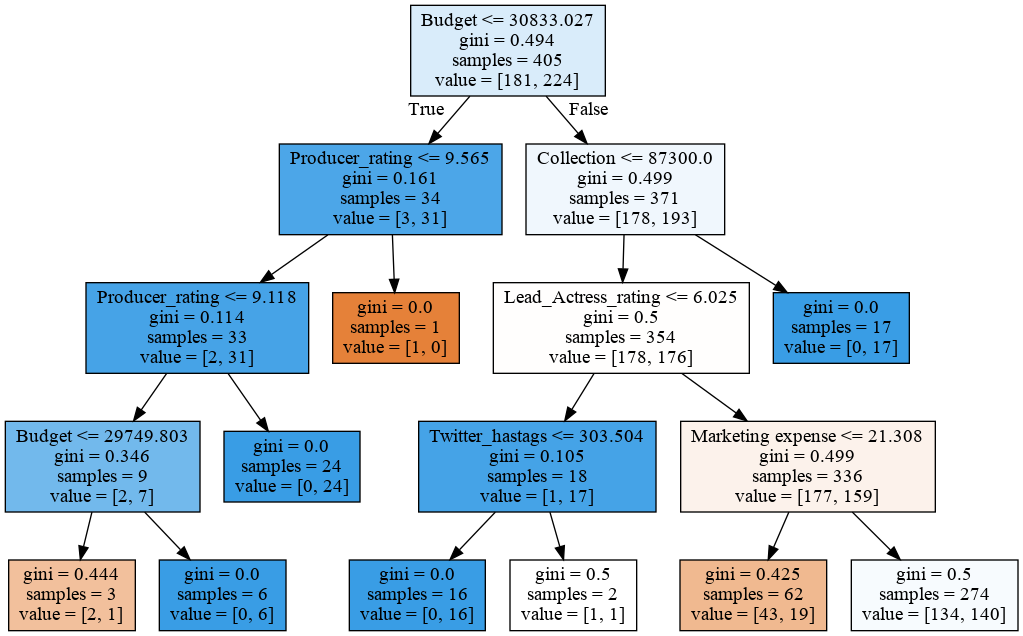

In [27]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Controlling Growth of tree

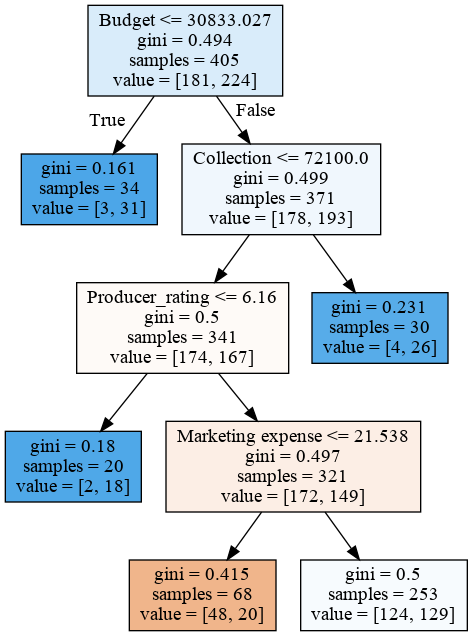

In [28]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
clftree2.fit(X_train,y_train)
dot_data = tree.export_graphviz(clftree2,out_file=None,feature_names=X_train.columns,filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [29]:
accuracy_score(y_test,clftree2.predict(X_test))

0.594059405940594

# Bagging (Ensemble technic)

In [30]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [31]:
from sklearn.ensemble import BaggingClassifier

In [32]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000, bootstrap=True, n_jobs=-1,random_state= 42)

In [33]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [34]:
confusion_matrix(y_test,bag_clf.predict(X_test))

array([[30, 19],
       [14, 38]])

In [35]:
accuracy_score(y_test,bag_clf.predict(X_test))

0.6732673267326733

# Random Forest 

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf_clf = RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)

In [38]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [39]:
confusion_matrix(y_test,rf_clf.predict(X_test))

array([[31, 18],
       [16, 36]])

In [40]:
accuracy_score(y_test,rf_clf.predict(X_test))

0.6633663366336634

# Grid Search

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)

In [43]:
params_grid = {"n_estimators":[250,500],"max_features" : [10,11,12],"min_samples_split":[2,3,10]}

In [44]:
grid_search = GridSearchCV(rf_clf,params_grid, n_jobs=-1, cv=5, scoring="accuracy")

In [45]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [10, 11, 12],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [250, 500]},
             scoring='accuracy')

In [46]:
grid_search.best_params_

{'max_features': 12, 'min_samples_split': 2, 'n_estimators': 250}

In [47]:
cvrf_clf = grid_search.best_estimator_

In [48]:
accuracy_score(y_test,cvrf_clf.predict(X_test))

0.6534653465346535

In [49]:
confusion_matrix(y_test,cvrf_clf.predict(X_test))

array([[29, 20],
       [15, 37]])

# Gradient Boosting 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [52]:
accuracy_score(y_test,gbc_clf.predict(X_test))

0.5841584158415841

In [53]:
gbc_clf2 = GradientBoostingClassifier(learning_rate=0.01,n_estimators=500,max_depth=3)
gbc_clf2.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)

In [54]:
accuracy_score(y_test,gbc_clf2.predict(X_test))

0.6534653465346535

# Ada Boosting 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
ada_clf = AdaBoostClassifier(learning_rate=0.015,n_estimators=500)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.015, n_estimators=500)

In [57]:
accuracy_score(y_test,ada_clf.predict(X_test))

0.594059405940594

In [58]:
ada_clf2 = AdaBoostClassifier(rf_clf,learning_rate=0.01,n_estimators=1000)
ada_clf2.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=250,
                                                         random_state=42),
                   learning_rate=0.01, n_estimators=1000)

In [59]:
accuracy_score(y_test,ada_clf2.predict(X_test))

0.6435643564356436

# XG boost
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [60]:
import xgboost as xgb

parameter tunning

1 general parameters : Guide the overall functionng
2 Booster parameters : Guide the individual booster (tree/regression) at each step
3 learning task parameters : Guide the optimization performed

In [61]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators= 10000,learning_rate=0.3,n_jobs=-1)

In [62]:
xgb_clf.fit(X_train,y_train)

/home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:56:52] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [63]:
accuracy_score(y_test,xgb_clf.predict(X_test))

0.6435643564356436

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

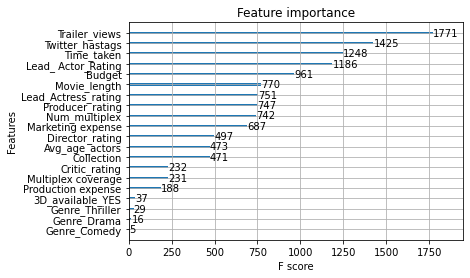

In [64]:
xgb.plot_importance(xgb_clf)

In [65]:
xgb_clf = xgb.XGBClassifier(n_estimators=250,learning_rate=0.1,random_state=42)

In [67]:
param_test1 =  {"max_depth":range(3,10,2),"gamma":[0.1,0.2,0.3],"subsample":[0.8,0.9],"colsample_bytree":[0.8,0.9],"reg_alpha":[1e-2,0.1,1]}

In [68]:
grid_search=GridSearchCV(xgb_clf,param_test1,n_jobs=-1,cv=5,scoring="accuracy")

In [69]:
grid_search.fit(X_train,y_train)

/home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:19:16] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=250, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [70]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.2,
 'max_depth': 9,
 'reg_alpha': 0.01,
 'subsample': 0.9}

In [71]:
cvxg_clf = grid_searcharch.best_estimator_
accuracy_score(y_test, cvxg_clf.predict(X_test))

0.6633663366336634